In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd

/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imsparsh/flowers-dataset

 90% 185M/205M [00:05<00:00, 35.1MB/s]
100% 205M/205M [00:05<00:00, 36.2MB/s]


In [ ]:
!unzip flowers-dataset.zip

Archive:  flowers-dataset.zip
  inflating: LICENSE.txt             
  inflating: Testing_set_flower.csv  
  inflating: sample_submission.csv   
  inflating: test/Image_1.jpg        
  inflating: test/Image_10.jpg       
  inflating: test/Image_100.jpg      
  inflating: test/Image_101.jpg      
  inflating: test/Image_102.jpg      
  inflating: test/Image_103.jpg      
  inflating: test/Image_104.jpg      
  inflating: test/Image_105.jpg      
  inflating: test/Image_106.jpg      
  inflating: test/Image_107.jpg      
  inflating: test/Image_108.jpg      
  inflating: test/Image_109.jpg      
  inflating: test/Image_11.jpg       
  inflating: test/Image_110.jpg      
  inflating: test/Image_111.jpg      
  inflating: test/Image_112.jpg      
  inflating: test/Image_113.jpg      
  inflating: test/Image_114.jpg      
  inflating: test/Image_115.jpg      
  inflating: test/Image_116.jpg      
  inflating: test/Image_117.jpg      
  inflating: test/Image_118.jpg      
  inflating: test/Im

In [ ]:
# import the necessary packages
from turtle import title
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from imutils import paths
import numpy as np
import seaborn as sns
import cv2
from tqdm import tqdm
import os
import imutils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
#%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers

In [117]:
FLOWER_DAISY_DIR = '/content/train/daisy'
FLOWER_SUNFLOWER_DIR = '/content/train/sunflower'
FLOWER_TULIP_DIR = '/content/train/tulip'
FLOWER_DANDI_DIR = '/content/train/dandelion'
FLOWER_ROSE_DIR = '/content/train/rose'

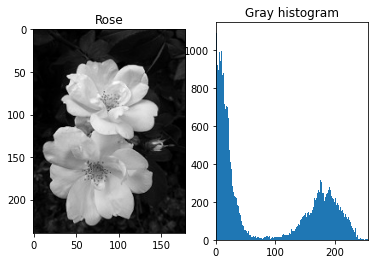

In [118]:
img = cv2.imread(os.path.join(FLOWER_ROSE_DIR,'10090824183_d02c613f10_m.jpg'),0)
plt.subplot(121), plt.imshow(img, 'gray')
plt.title('Rose')
plt.subplot(122)
plt.hist(img.ravel(),256,[0,256])
plt.xlim([0,256])
plt.title('Gray histogram')
plt.show()

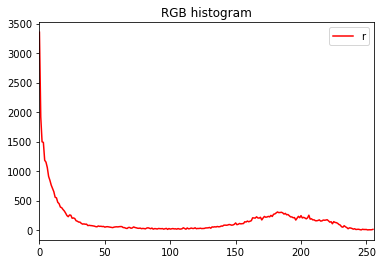

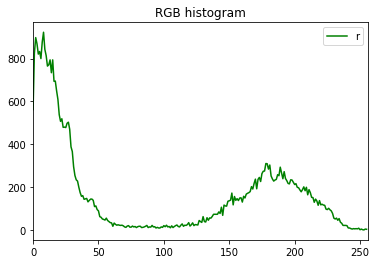

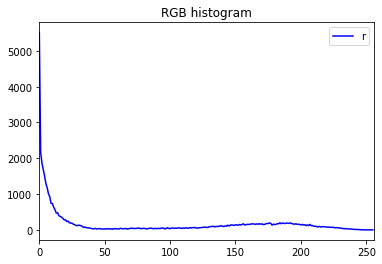

In [ ]:
img = plt.imread(os.path.join(FLOWER_ROSE_DIR,'10090824183_d02c613f10_m.jpg'))
color = ('r','g','b')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.title('RGB histogram')
    plt.legend(color)
    plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff5b13d21d0>,
 Text(0.5, 1.0, 'original image'))

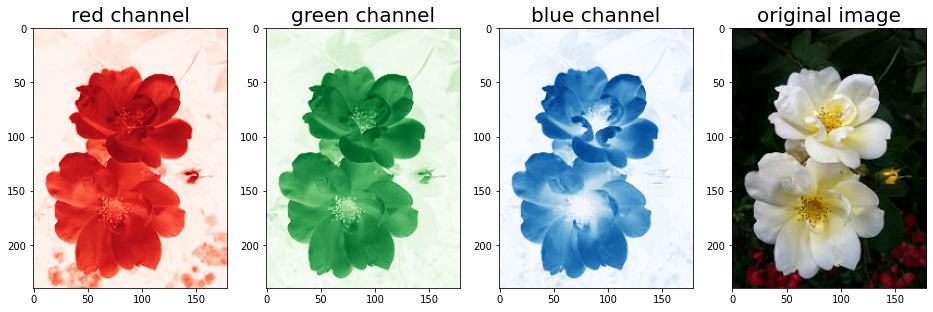

In [ ]:
blue_channel = img[:,:,2]
#red_img = np.zeros(img.shape)
#red_img[:,:,2] = red_channel
plt.figure(figsize=(16,16))
plt.subplot(141), plt.imshow(img[:,:,0],cmap="Reds"),plt.title(
    "red channel", fontsize=20)
plt.subplot(142),plt.imshow(img[:,:,1], cmap="Greens"),plt.title("green channel", fontsize=20)
plt.subplot(143),plt.imshow(blue_channel,cmap="Blues"),plt.title(
    "blue channel", fontsize=20)
plt.subplot(144),plt.imshow(img),plt.title(
    "original image",fontsize=20)

In [ ]:
def extract_color_histogram(image,bins=(6,6,6),IMG_SIZE=150):
    #extract a 3D color histogram from the default BGR color space using
    #the supplied number of 'bins' per channel
    rgb = cv2.imread(image,cv2.IMREAD_COLOR)
    rgb = cv2.resize(rgb,(IMG_SIZE, IMG_SIZE))
    hist = cv2.calcHist([rgb],[0,1,2],None,bins,
                        [0,256,0,256,0,256])
    #print(rgb.shape)
    #print(hist.shape)
    #handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    #otherwise,perform "in place" normalization in OpenCV 3(I personally hate the way this is done)
    else:
        cv2.normalize(hist, hist)
        #retrun the flattened histogram as the feature vector
        return hist.flatten()


In [ ]:
img = extract_color_histogram(os.path.join(FLOWER_ROSE_DIR, '10090824183_d02c613f10_m.jpg'))
print(img.shape)
img

(216,)


array([9.5192480e-01, 6.4209618e-02, 2.0108657e-02, 1.0356390e-03,
       0.0000000e+00, 0.0000000e+00, 5.7564266e-02, 1.1392029e-02,
       4.3151625e-03, 8.6303247e-05, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.5890975e-03, 1.0960513e-02,
       6.0412276e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.9699492e-03, 1.0442693e-02, 6.0412276e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.9042598e-04, 2.3301877e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.7260649e-04, 8.6303247e-05, 6.0412276e-04, 5.1781948e-04,
       0.0000000e+00, 0.0000000e+00, 1.2945487e-03, 1.1392029e-02,
       8.6303247e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.7672920e-04, 4.9192850e-03, 3.2795235e-03,
       8.6303247e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.0367566e-02, 1.7174346e-02, 0.0000000e

In [ ]:
#2.2) Loading the images data
X=[]
images = []
Z =[]

def assign_label(img, flower_type):
        return flower_type

In [ ]:
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR,img)
        image_hist = extract_color_histogram(path)

        X.append(np.array(image_hist))
        images.append(plt.imread(path))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

print("[INFO] features matrix: {:.2f}MB".format(
    np.array(X).nbytes / (1024 * 1000.0))
)

100%|██████████| 501/501 [00:02<00:00, 181.35it/s]


501


100%|██████████| 495/495 [00:03<00:00, 158.48it/s]


996


100%|██████████| 607/607 [00:03<00:00, 158.67it/s]


1603


100%|██████████| 646/646 [00:03<00:00, 179.97it/s]


2249


100%|██████████| 497/497 [00:02<00:00, 173.20it/s]

2746
[INFO] features matrix: 2.32MB


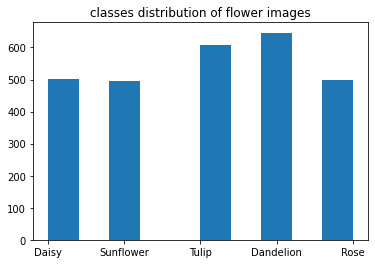

In [ ]:
# 3)Divde dataset into training set and data set
Z

plt.hist(Z)
plt.title('classes distribution of flower images')
plt.show()

In [ ]:
x_train, x_test, label_train, label_test = train_test_split(
    X, Z, test_size=0.25, random_state=42)

idx = list(range(0,len(X)))
train_index, test_index, label_train_idx, label_test_idx, = train_test_split(
    idx, idx, test_size=0.25, random_state=42)
#print(train_index==label_train_idx)
#print(test_index)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


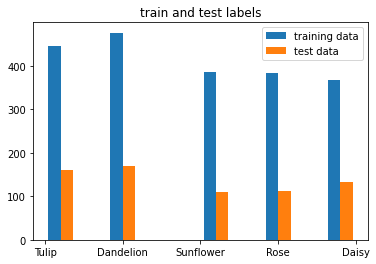

In [ ]:
plt.hist((label_train, label_test))
plt.legend(labels = ['training data', 'test data'])
plt.title('train and test labels')
plt.show()


In [ ]:
#4) KNN classfier with evaluation on test data
K=[]
accuracy = []
for i in range(5,51,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, label_train)
    acc = knn_model.score(x_test,label_test)
    print("[INFO] histogram accuracy: {:.2f}%".format(acc*100)+" === k-neighbors:{}".format(i))
    K.append(i)
    accuracy.append(acc)

best_K = np.argmax(accuracy)
print(K[best_K])

[INFO] histogram accuracy: 47.31% === k-neighbors:5
[INFO] histogram accuracy: 47.16% === k-neighbors:7
[INFO] histogram accuracy: 47.16% === k-neighbors:9
[INFO] histogram accuracy: 48.47% === k-neighbors:11
[INFO] histogram accuracy: 49.78% === k-neighbors:13
[INFO] histogram accuracy: 50.66% === k-neighbors:15
[INFO] histogram accuracy: 49.93% === k-neighbors:17
[INFO] histogram accuracy: 49.64% === k-neighbors:19
[INFO] histogram accuracy: 49.05% === k-neighbors:21
[INFO] histogram accuracy: 49.93% === k-neighbors:23
[INFO] histogram accuracy: 49.49% === k-neighbors:25
[INFO] histogram accuracy: 49.05% === k-neighbors:27
[INFO] histogram accuracy: 48.91% === k-neighbors:29
[INFO] histogram accuracy: 49.93% === k-neighbors:31
[INFO] histogram accuracy: 49.34% === k-neighbors:33
[INFO] histogram accuracy: 49.20% === k-neighbors:35
[INFO] histogram accuracy: 49.05% === k-neighbors:37
[INFO] histogram accuracy: 47.89% === k-neighbors:39
[INFO] histogram accuracy: 48.76% === k-neighbors

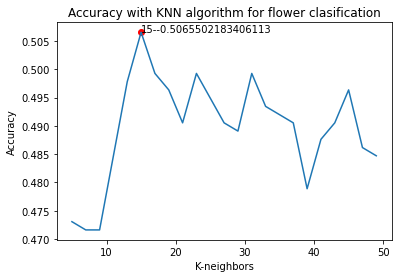

In [ ]:
fig, ax=plt.subplots()
ax.plot(K, accuracy)
ax.scatter(K[best_K], accuracy[best_K], c = 'red')
ax.annotate(str(K[best_K]) + "--" + str(accuracy[best_K]), xy=(K[best_K], accuracy[best_K]))
plt.title('Accuracy with KNN algorithm for flower clasification')
plt.xlabel("K-neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#!pip install sklearn

In [ ]:
#Evaluation the Model Performance

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, accuracy_score

from datetime import datetime as dt

start = dt.now()
# process stuff
running_secs = (dt.now() - start).seconds
best_knn = KNeighborsClassifier(n_neighbors=23)
best_knn_model = best_knn.fit(x_train, label_train)

pred_test = best_knn_model.predict(x_test)

pred_test
cm = confusion_matrix(label_test, pred_test, labels=["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"])

f1 = f1_score(label_test, pred_test, labels=["Daisy", "Dandelion", "Rose","Sunflower","Tulip"], average="macro")
f1

acc = accuracy_score(label_test, pred_test)
acc
print(cm)

[[75 31 12  6  9]
 [38 90 16 15 11]
 [15 24 50  7 17]
 [10 19  5 68  8]
 [27 37 22 15 60]]


In [ ]:
float(running_secs)

0.0

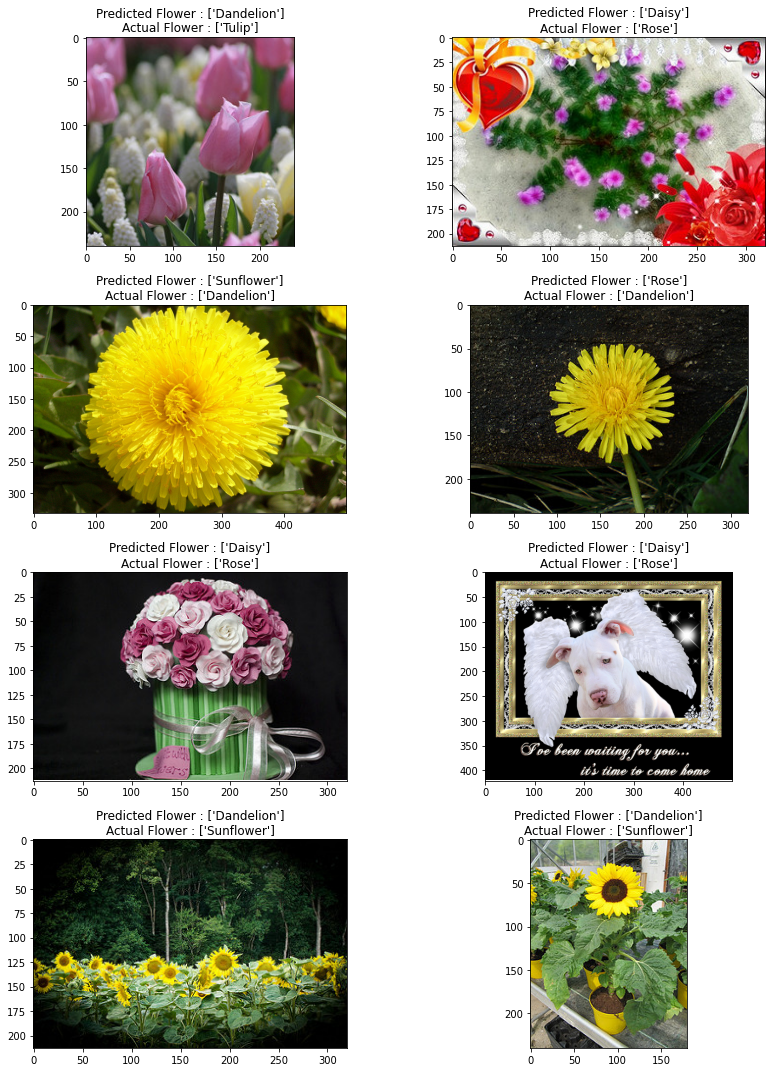

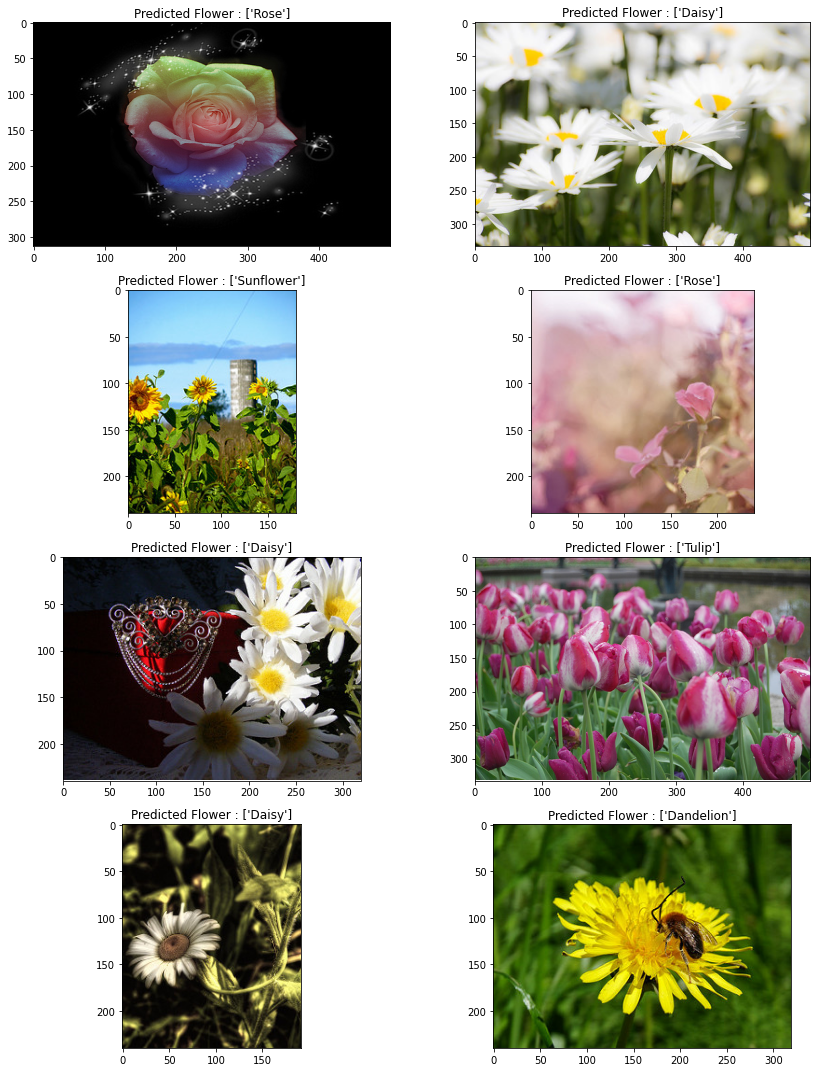

In [ ]:
#MISCLASSIFIED IMAGES OF FLOWERS

#now storing same properly as well as misclassified indexes
i = 0
prop_class = []
mis_class = []

for i in range(len(label_test)):
    if(label_test[i]==pred_test[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i = 0
for i in range(len(label_test)):
    if(not label_test[i] == pred_test[i]):
        mis_class.append(i)
    if(len(mis_class) == 8):
        break

mis_class

count = 0
fig, ax = plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(images[test_index[mis_class[count]]])
        ax[i,j].set_title("Predicted Flower : " + str([pred_test[mis_class[count]]]) +
                          "\n"+"Actual Flower : " +str([label_test[mis_class[count]]]))
        plt.tight_layout()
        count += 1

count = 0
fig, ax = plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(images[test_index[prop_class[count]]])
        ax[i,j].set_title("Predicted Flower : " + str([label_test[prop_class[count]]]))

        plt.tight_layout()
        count += 1
